<a href="https://colab.research.google.com/github/luhuim/ML_Project/blob/main/Email.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Title**: Classify an email into eight classes based on the metadata extracted from the emails.  
**Date**: 2022 July 9th   
**Author**: Huimin Lu     
**Description**: We often face the problem of searching meaningful emails from thousands of promotional emails. This challenge focuses on creating a multi-class classifier that can classify an email into eight classes based on the metadata extracted from the email.
In this script, I use decision tree (a kind of supervised learning) to construct model and make prediction.   
**Evaluation**: The evaluation metric for this competition is F1-Score.  
**Model:**Decision tree  
**Procedure**：  
1, discover the training dataset.    
2, choose the column we want to use to construct model.   
3, split training data into training and test data.  
4, construct model, training this model with training data.    
5, make prediction using test data, and get F1-score.  
6, using this model to predict test dataset.




In [ ]:
# Import package and training dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
from sklearn.datasets import load_iris
from sklearn import tree
import numpy as np

train_df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Challenge/train.csv',
                       usecols=['org','tld','mail_type','label'], dtype="category")
train_df = train_df.dropna() #drop invalid data cell, "NaN"

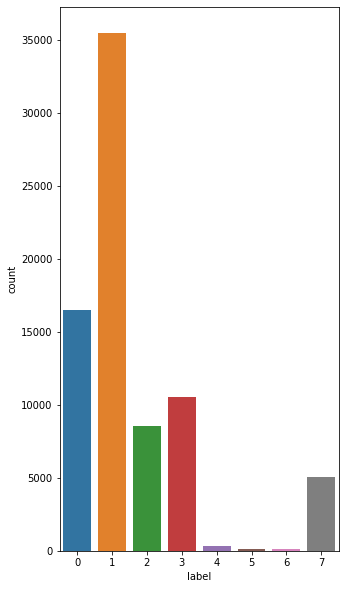

In [ ]:
#looking at distribution of label
train_df['label'].value_counts()
plt.figure(figsize=(5,10));
sns.countplot(train_df['label']);


In our example file, I found that even if only use the column "mail_type" it can still get F1-score: 0.45. So I try to use all categorical variable to cnstruct model.  
And decision tree only require numerical variable, so we use `OneHotEncoder()` to transform categgorical variable into numeric variable.    

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
# "X" include all columns we want to use
X = train_df[['org','tld','mail_type']]
#print(X)
y=train_df['label']# "y" is label
#print(y)

#Splitting data into training and testing data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.7)
#print(X_train,X_test,y_train,y_test)

## Do one hot encoding of categorical feature
feat_enc = OneHotEncoder()
feat_enc.fit(np.vstack([X_train,X_test]))
train_x_featurized = feat_enc.transform(X_train) #This is converted "X_train"
test_x_featurized = feat_enc.transform(X_test) ##This is converted "X_train"

# Creating Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion="gini")
clf.fit(train_x_featurized,y_train) #training the model

# Making Predictions with Our Model, predictiong "X_test"
predictions = clf.predict(test_x_featurized) # predicted "y" is "predictions"



Calculate F1-Score of this model.

In [ ]:
import numpy as np
from sklearn.metrics import f1_score
#calculate F1 score
f1_score(y_test, predictions, average='weighted')

0.5429395497633135

Now we use this model to predict test dataset.
And finally, I got a score 0.56 through Kaggle. And this is the highest score I can get using decision tree.

In [ ]:
# Predict test.csv
#import package and dataset
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
## Read csvs
train_df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Challenge/train.csv',
                       usecols=['org','tld','mail_type','label'], dtype="category")
test_df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Challenge/test.csv',
                       usecols=['org','tld','mail_type'], dtype="category")

## Filtering column "mail_type"
train_x= train_df[['org','tld','mail_type']]
#train_x = train_x.fillna(value='None')#fill "Na" with "none"
train_y = train_df[['label']] #extract column "label"
test_x = test_df[['org','tld','mail_type']]

## Do one hot encoding of categorical feature
feat_enc = OneHotEncoder()
feat_enc.fit(np.vstack([train_x, test_x]))
train_x_featurized = feat_enc.transform(train_x)
test_x_featurized = feat_enc.transform(test_x)

# Creating Our First Decision Tree Classifier
clf=DecisionTreeClassifier(criterion="gini")
clf.fit(train_x_featurized,train_y) #training the model
# Making Predictions with Our Model, predictiong "X_test"
pred_y = clf.predict(test_x_featurized) # predicted "y" is "predictions"
#print(len(pred_y))
## Save results to submission file
pred_df = pd.DataFrame(pred_y, columns=['label'])
pred_df.to_csv("knn_sample_submission.csv", index=True, index_label='Id')
